In [1]:
#import
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from datetime import datetime
import os
import pickle
import seaborn as sns
import datetime as dt
from model import StockEnv,get_scaler, play_one_episode, LinearModel, DQNAgent
from tqdm.notebook import tqdm
import pyfolio as pf
%matplotlib inline

C:\Users\User\anaconda3\envs\MyDjango\lib\site-packages\pyfolio\pos.py:26: UserWarning: Module "zipline.assets" not found; mutltipliers will not be applied to position notionals.
  warnings.warn(


Stock name: TD
Start: 2013-02-19 00:00:00, End: 2020-12-31 00:00:00
Training data: 1227 
Tsesting data: 756 


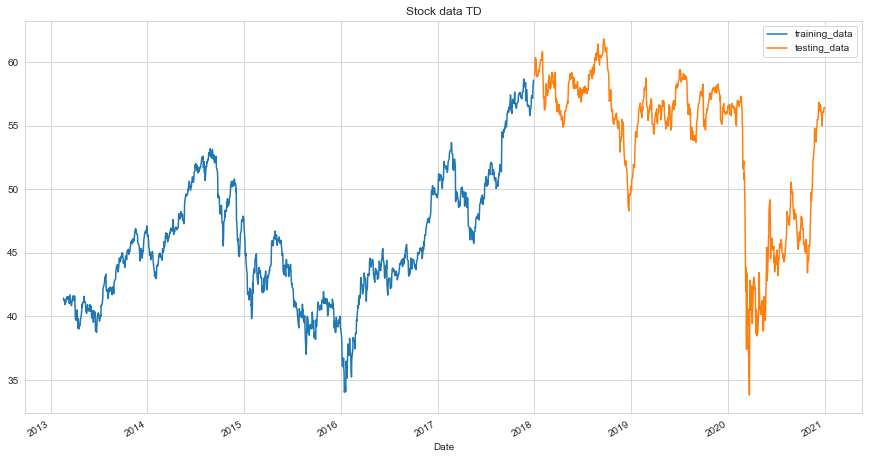

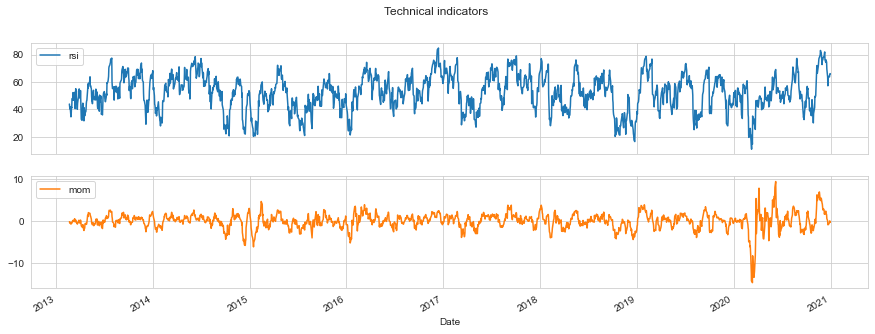

In [2]:
stock_name = 'td'.upper()
industry = 'Financial Services'
stock_data = pd.read_csv(f'../train_test_data/{stock_name}.csv', index_col=['Date'], parse_dates=True)

train_data = stock_data.loc[:'2018-01-01']
test_data = stock_data.loc['2018-01-01':]

print(f'Stock name: {stock_name}')
print(f'Start: {stock_data.index[0]}, End: {stock_data.index[-1]}')
print(f'Training data: {len(train_data)} ')
print(f'Tsesting data: {len(test_data)} ')

sns.set_style('whitegrid')
train_data['Adj Close'].plot(label='training_data', figsize=(15,8));
test_data['Adj Close'].plot(label='testing_data');
plt.title('Stock data '+ stock_name)
plt.legend();
plt.show()

stock_data[['rsi', 'mom']].plot(subplots=True, figsize=(15,5), title='Technical indicators');
plt.show()




In [3]:
num_episodes = 2000
batch_size = 32
capital = 1000
data = stock_data['Adj Close'].values
n_timesteps = data.shape[0]


env = StockEnv(train_data, capital)
state_size = env.state_dim
action_size = 2
agent = DQNAgent(state_size, action_size)
scaler = get_scaler(env)

  0%|          | 0/2000 [00:00<?, ?it/s]

episode: 1/2000, episode end value: 1168.27, duration: 0:00:00.412093
episode: 2/2000, episode end value: 1144.55, duration: 0:00:00.433097
episode: 3/2000, episode end value: 1211.41, duration: 0:00:00.425094
episode: 4/2000, episode end value: 1166.25, duration: 0:00:00.455675
episode: 5/2000, episode end value: 1128.18, duration: 0:00:00.418453
episode: 6/2000, episode end value: 1151.68, duration: 0:00:00.427095
episode: 7/2000, episode end value: 1135.60, duration: 0:00:00.321076
episode: 8/2000, episode end value: 1169.75, duration: 0:00:00.393091
episode: 9/2000, episode end value: 1148.06, duration: 0:00:00.331073
episode: 10/2000, episode end value: 1175.62, duration: 0:00:00.320072
episode: 11/2000, episode end value: 1179.86, duration: 0:00:00.362082
episode: 12/2000, episode end value: 1194.04, duration: 0:00:00.358085
episode: 13/2000, episode end value: 1211.87, duration: 0:00:00.301065
episode: 14/2000, episode end value: 1166.34, duration: 0:00:00.334079
episode: 15/200

episode: 117/2000, episode end value: 1148.63, duration: 0:00:00.462106
episode: 118/2000, episode end value: 1200.81, duration: 0:00:00.382085
episode: 119/2000, episode end value: 1240.52, duration: 0:00:00.393090
episode: 120/2000, episode end value: 1188.64, duration: 0:00:00.350078
episode: 121/2000, episode end value: 1185.41, duration: 0:00:00.426095
episode: 122/2000, episode end value: 1149.80, duration: 0:00:00.411092
episode: 123/2000, episode end value: 1166.55, duration: 0:00:00.367089
episode: 124/2000, episode end value: 1174.21, duration: 0:00:00.386085
episode: 125/2000, episode end value: 1171.12, duration: 0:00:00.381086
episode: 126/2000, episode end value: 1195.39, duration: 0:00:00.440102
episode: 127/2000, episode end value: 1165.84, duration: 0:00:00.375085
episode: 128/2000, episode end value: 1186.30, duration: 0:00:00.338081
episode: 129/2000, episode end value: 1214.22, duration: 0:00:00.348087
episode: 130/2000, episode end value: 1195.83, duration: 0:00:00

episode: 231/2000, episode end value: 1159.08, duration: 0:00:00.302069
episode: 232/2000, episode end value: 1198.86, duration: 0:00:00.367811
episode: 233/2000, episode end value: 1151.74, duration: 0:00:00.284839
episode: 234/2000, episode end value: 1236.96, duration: 0:00:00.400082
episode: 235/2000, episode end value: 1209.44, duration: 0:00:00.320070
episode: 236/2000, episode end value: 1196.78, duration: 0:00:00.385406
episode: 237/2000, episode end value: 1178.90, duration: 0:00:00.429569
episode: 238/2000, episode end value: 1198.22, duration: 0:00:00.444106
episode: 239/2000, episode end value: 1198.52, duration: 0:00:00.426095
episode: 240/2000, episode end value: 1156.61, duration: 0:00:00.486110
episode: 241/2000, episode end value: 1177.17, duration: 0:00:00.498112
episode: 242/2000, episode end value: 1183.87, duration: 0:00:00.495116
episode: 243/2000, episode end value: 1196.35, duration: 0:00:00.490111
episode: 244/2000, episode end value: 1196.84, duration: 0:00:00

episode: 345/2000, episode end value: 1157.92, duration: 0:00:00.404096
episode: 346/2000, episode end value: 1202.34, duration: 0:00:00.452104
episode: 347/2000, episode end value: 1197.22, duration: 0:00:00.387088
episode: 348/2000, episode end value: 1193.80, duration: 0:00:00.398091
episode: 349/2000, episode end value: 1113.89, duration: 0:00:00.351081
episode: 350/2000, episode end value: 1119.64, duration: 0:00:00.360083
episode: 351/2000, episode end value: 1148.44, duration: 0:00:00.456107
episode: 352/2000, episode end value: 1174.25, duration: 0:00:00.370079
episode: 353/2000, episode end value: 1196.46, duration: 0:00:00.399098
episode: 354/2000, episode end value: 1192.79, duration: 0:00:00.438102
episode: 355/2000, episode end value: 1189.48, duration: 0:00:00.456100
episode: 356/2000, episode end value: 1192.17, duration: 0:00:00.363088
episode: 357/2000, episode end value: 1188.24, duration: 0:00:00.460102
episode: 358/2000, episode end value: 1196.01, duration: 0:00:00

episode: 459/2000, episode end value: 1165.30, duration: 0:00:00.443577
episode: 460/2000, episode end value: 1182.96, duration: 0:00:00.407997
episode: 461/2000, episode end value: 1188.95, duration: 0:00:00.412594
episode: 462/2000, episode end value: 1170.13, duration: 0:00:00.417096
episode: 463/2000, episode end value: 1165.68, duration: 0:00:00.446100
episode: 464/2000, episode end value: 1216.30, duration: 0:00:00.458102
episode: 465/2000, episode end value: 1187.90, duration: 0:00:00.440101
episode: 466/2000, episode end value: 1166.43, duration: 0:00:00.419095
episode: 467/2000, episode end value: 1125.83, duration: 0:00:00.405093
episode: 468/2000, episode end value: 1206.18, duration: 0:00:00.474104
episode: 469/2000, episode end value: 1200.28, duration: 0:00:00.433097
episode: 470/2000, episode end value: 1194.79, duration: 0:00:00.540123
episode: 471/2000, episode end value: 1200.35, duration: 0:00:00.517116
episode: 472/2000, episode end value: 1185.32, duration: 0:00:00

episode: 573/2000, episode end value: 1192.01, duration: 0:00:00.398090
episode: 574/2000, episode end value: 1176.99, duration: 0:00:00.411091
episode: 575/2000, episode end value: 1201.03, duration: 0:00:00.478110
episode: 576/2000, episode end value: 1206.31, duration: 0:00:00.352078
episode: 577/2000, episode end value: 1173.20, duration: 0:00:00.359080
episode: 578/2000, episode end value: 1182.77, duration: 0:00:00.442101
episode: 579/2000, episode end value: 1189.70, duration: 0:00:00.406092
episode: 580/2000, episode end value: 1180.78, duration: 0:00:00.353078
episode: 581/2000, episode end value: 1170.97, duration: 0:00:00.425095
episode: 582/2000, episode end value: 1170.40, duration: 0:00:00.422094
episode: 583/2000, episode end value: 1191.55, duration: 0:00:00.367083
episode: 584/2000, episode end value: 1182.77, duration: 0:00:00.447101
episode: 585/2000, episode end value: 1150.27, duration: 0:00:00.498112
episode: 586/2000, episode end value: 1157.80, duration: 0:00:00

episode: 687/2000, episode end value: 1180.57, duration: 0:00:00.460106
episode: 688/2000, episode end value: 1198.14, duration: 0:00:00.459101
episode: 689/2000, episode end value: 1176.48, duration: 0:00:00.409092
episode: 690/2000, episode end value: 1172.68, duration: 0:00:00.480953
episode: 691/2000, episode end value: 1179.30, duration: 0:00:00.470736
episode: 692/2000, episode end value: 1181.28, duration: 0:00:00.426099
episode: 693/2000, episode end value: 1165.45, duration: 0:00:00.402091
episode: 694/2000, episode end value: 1185.22, duration: 0:00:00.436099
episode: 695/2000, episode end value: 1150.52, duration: 0:00:00.451100
episode: 696/2000, episode end value: 1192.74, duration: 0:00:00.491112
episode: 697/2000, episode end value: 1210.41, duration: 0:00:00.495112
episode: 698/2000, episode end value: 1166.37, duration: 0:00:00.485108
episode: 699/2000, episode end value: 1177.60, duration: 0:00:00.450118
episode: 700/2000, episode end value: 1199.18, duration: 0:00:00

episode: 801/2000, episode end value: 1161.26, duration: 0:00:00.369084
episode: 802/2000, episode end value: 1181.39, duration: 0:00:00.411092
episode: 803/2000, episode end value: 1183.84, duration: 0:00:00.349601
episode: 804/2000, episode end value: 1116.58, duration: 0:00:00.388258
episode: 805/2000, episode end value: 1210.61, duration: 0:00:00.437101
episode: 806/2000, episode end value: 1169.29, duration: 0:00:00.401590
episode: 807/2000, episode end value: 1190.84, duration: 0:00:00.368377
episode: 808/2000, episode end value: 1193.56, duration: 0:00:00.447101
episode: 809/2000, episode end value: 1187.14, duration: 0:00:00.434100
episode: 810/2000, episode end value: 1173.51, duration: 0:00:00.404086
episode: 811/2000, episode end value: 1140.97, duration: 0:00:00.371082
episode: 812/2000, episode end value: 1187.48, duration: 0:00:00.462105
episode: 813/2000, episode end value: 1174.68, duration: 0:00:00.371084
episode: 814/2000, episode end value: 1195.57, duration: 0:00:00

episode: 915/2000, episode end value: 1183.88, duration: 0:00:00.368083
episode: 916/2000, episode end value: 1180.99, duration: 0:00:00.425096
episode: 917/2000, episode end value: 1191.60, duration: 0:00:00.447102
episode: 918/2000, episode end value: 1205.65, duration: 0:00:00.399091
episode: 919/2000, episode end value: 1191.51, duration: 0:00:00.423095
episode: 920/2000, episode end value: 1190.04, duration: 0:00:00.379091
episode: 921/2000, episode end value: 1169.04, duration: 0:00:00.458881
episode: 922/2000, episode end value: 1191.79, duration: 0:00:00.380084
episode: 923/2000, episode end value: 1184.31, duration: 0:00:00.372086
episode: 924/2000, episode end value: 1198.45, duration: 0:00:00.446764
episode: 925/2000, episode end value: 1174.16, duration: 0:00:00.378092
episode: 926/2000, episode end value: 1135.21, duration: 0:00:00.379082
episode: 927/2000, episode end value: 1158.54, duration: 0:00:00.427103
episode: 928/2000, episode end value: 1186.25, duration: 0:00:00

episode: 1029/2000, episode end value: 1187.58, duration: 0:00:00.456108
episode: 1030/2000, episode end value: 1187.23, duration: 0:00:00.410097
episode: 1031/2000, episode end value: 1187.23, duration: 0:00:00.379085
episode: 1032/2000, episode end value: 1193.73, duration: 0:00:00.360081
episode: 1033/2000, episode end value: 1202.55, duration: 0:00:00.368083
episode: 1034/2000, episode end value: 1185.31, duration: 0:00:00.413094
episode: 1035/2000, episode end value: 1171.58, duration: 0:00:00.411094
episode: 1036/2000, episode end value: 1160.44, duration: 0:00:00.377090
episode: 1037/2000, episode end value: 1169.39, duration: 0:00:00.423094
episode: 1038/2000, episode end value: 1179.49, duration: 0:00:00.396088
episode: 1039/2000, episode end value: 1158.79, duration: 0:00:00.397089
episode: 1040/2000, episode end value: 1162.09, duration: 0:00:00.472112
episode: 1041/2000, episode end value: 1187.15, duration: 0:00:00.363652
episode: 1042/2000, episode end value: 1183.24, dur

episode: 1142/2000, episode end value: 1184.90, duration: 0:00:00.367083
episode: 1143/2000, episode end value: 1196.15, duration: 0:00:00.403095
episode: 1144/2000, episode end value: 1181.81, duration: 0:00:00.427095
episode: 1145/2000, episode end value: 1181.65, duration: 0:00:00.434099
episode: 1146/2000, episode end value: 1181.35, duration: 0:00:00.377086
episode: 1147/2000, episode end value: 1181.69, duration: 0:00:00.431096
episode: 1148/2000, episode end value: 1159.59, duration: 0:00:00.426099
episode: 1149/2000, episode end value: 1194.67, duration: 0:00:00.452102
episode: 1150/2000, episode end value: 1195.80, duration: 0:00:00.444098
episode: 1151/2000, episode end value: 1159.16, duration: 0:00:00.444456
episode: 1152/2000, episode end value: 1155.37, duration: 0:00:00.364080
episode: 1153/2000, episode end value: 1189.08, duration: 0:00:00.368085
episode: 1154/2000, episode end value: 1199.59, duration: 0:00:00.376084
episode: 1155/2000, episode end value: 1174.91, dur

episode: 1255/2000, episode end value: 1205.47, duration: 0:00:00.425093
episode: 1256/2000, episode end value: 1203.85, duration: 0:00:00.358081
episode: 1257/2000, episode end value: 1194.41, duration: 0:00:00.416095
episode: 1258/2000, episode end value: 1186.70, duration: 0:00:00.382085
episode: 1259/2000, episode end value: 1181.87, duration: 0:00:00.436098
episode: 1260/2000, episode end value: 1200.06, duration: 0:00:00.378084
episode: 1261/2000, episode end value: 1186.91, duration: 0:00:00.447100
episode: 1262/2000, episode end value: 1175.98, duration: 0:00:00.417096
episode: 1263/2000, episode end value: 1203.84, duration: 0:00:00.387092
episode: 1264/2000, episode end value: 1155.46, duration: 0:00:00.407093
episode: 1265/2000, episode end value: 1116.39, duration: 0:00:00.396088
episode: 1266/2000, episode end value: 1129.30, duration: 0:00:00.410096
episode: 1267/2000, episode end value: 1215.16, duration: 0:00:00.455105
episode: 1268/2000, episode end value: 1209.45, dur

episode: 1368/2000, episode end value: 1188.70, duration: 0:00:00.453101
episode: 1369/2000, episode end value: 1157.84, duration: 0:00:00.437099
episode: 1370/2000, episode end value: 1202.34, duration: 0:00:00.375711
episode: 1371/2000, episode end value: 1208.21, duration: 0:00:00.423440
episode: 1372/2000, episode end value: 1174.69, duration: 0:00:00.347076
episode: 1373/2000, episode end value: 1185.81, duration: 0:00:00.383094
episode: 1374/2000, episode end value: 1192.09, duration: 0:00:00.362079
episode: 1375/2000, episode end value: 1179.41, duration: 0:00:00.397090
episode: 1376/2000, episode end value: 1165.31, duration: 0:00:00.363081
episode: 1377/2000, episode end value: 1198.68, duration: 0:00:00.414096
episode: 1378/2000, episode end value: 1193.16, duration: 0:00:00.389084
episode: 1379/2000, episode end value: 1218.32, duration: 0:00:00.405093
episode: 1380/2000, episode end value: 1177.78, duration: 0:00:00.420095
episode: 1381/2000, episode end value: 1180.48, dur

episode: 1481/2000, episode end value: 1182.59, duration: 0:00:00.417095
episode: 1482/2000, episode end value: 1171.86, duration: 0:00:00.443707
episode: 1483/2000, episode end value: 1169.57, duration: 0:00:00.387136
episode: 1484/2000, episode end value: 1216.67, duration: 0:00:00.420097
episode: 1485/2000, episode end value: 1126.45, duration: 0:00:00.329328
episode: 1486/2000, episode end value: 1185.91, duration: 0:00:00.480521
episode: 1487/2000, episode end value: 1122.18, duration: 0:00:00.369084
episode: 1488/2000, episode end value: 1157.07, duration: 0:00:00.403090
episode: 1489/2000, episode end value: 1124.76, duration: 0:00:00.429094
episode: 1490/2000, episode end value: 1178.54, duration: 0:00:00.459109
episode: 1491/2000, episode end value: 1306.24, duration: 0:00:00.329071
episode: 1492/2000, episode end value: 1203.95, duration: 0:00:00.418100
episode: 1493/2000, episode end value: 1203.82, duration: 0:00:00.366079
episode: 1494/2000, episode end value: 1186.02, dur

episode: 1594/2000, episode end value: 1216.05, duration: 0:00:00.437098
episode: 1595/2000, episode end value: 1156.59, duration: 0:00:00.388098
episode: 1596/2000, episode end value: 1181.23, duration: 0:00:00.419623
episode: 1597/2000, episode end value: 1173.03, duration: 0:00:00.364011
episode: 1598/2000, episode end value: 1177.51, duration: 0:00:00.402397
episode: 1599/2000, episode end value: 1194.67, duration: 0:00:00.386247
episode: 1600/2000, episode end value: 1155.06, duration: 0:00:00.364083
episode: 1601/2000, episode end value: 1168.85, duration: 0:00:00.423096
episode: 1602/2000, episode end value: 1173.00, duration: 0:00:00.352080
episode: 1603/2000, episode end value: 1168.46, duration: 0:00:00.368082
episode: 1604/2000, episode end value: 1158.72, duration: 0:00:00.418093
episode: 1605/2000, episode end value: 1192.72, duration: 0:00:00.402095
episode: 1606/2000, episode end value: 1188.42, duration: 0:00:00.423092
episode: 1607/2000, episode end value: 1208.23, dur

episode: 1707/2000, episode end value: 1176.60, duration: 0:00:00.341075
episode: 1708/2000, episode end value: 1215.03, duration: 0:00:00.398089
episode: 1709/2000, episode end value: 1162.21, duration: 0:00:00.403096
episode: 1710/2000, episode end value: 1172.54, duration: 0:00:00.457098
episode: 1711/2000, episode end value: 1175.15, duration: 0:00:00.477667
episode: 1712/2000, episode end value: 1187.40, duration: 0:00:00.414000
episode: 1713/2000, episode end value: 1163.68, duration: 0:00:00.399008
episode: 1714/2000, episode end value: 1167.35, duration: 0:00:00.397988
episode: 1715/2000, episode end value: 1179.42, duration: 0:00:00.411008
episode: 1716/2000, episode end value: 1165.07, duration: 0:00:00.428993
episode: 1717/2000, episode end value: 1166.54, duration: 0:00:00.483009
episode: 1718/2000, episode end value: 1175.97, duration: 0:00:00.322011
episode: 1719/2000, episode end value: 1174.10, duration: 0:00:00.374442
episode: 1720/2000, episode end value: 1201.69, dur

episode: 1820/2000, episode end value: 1198.35, duration: 0:00:00.336076
episode: 1821/2000, episode end value: 1201.18, duration: 0:00:00.338077
episode: 1822/2000, episode end value: 1186.60, duration: 0:00:00.370086
episode: 1823/2000, episode end value: 1179.95, duration: 0:00:00.343078
episode: 1824/2000, episode end value: 1183.63, duration: 0:00:00.375084
episode: 1825/2000, episode end value: 1192.25, duration: 0:00:00.388090
episode: 1826/2000, episode end value: 1231.45, duration: 0:00:00.451100
episode: 1827/2000, episode end value: 1207.45, duration: 0:00:00.425096
episode: 1828/2000, episode end value: 1165.53, duration: 0:00:00.370086
episode: 1829/2000, episode end value: 1167.66, duration: 0:00:00.430104
episode: 1830/2000, episode end value: 1182.46, duration: 0:00:00.335075
episode: 1831/2000, episode end value: 1195.37, duration: 0:00:00.325073
episode: 1832/2000, episode end value: 1187.63, duration: 0:00:00.307071
episode: 1833/2000, episode end value: 1175.37, dur

episode: 1933/2000, episode end value: 1180.06, duration: 0:00:00.284707
episode: 1934/2000, episode end value: 1187.10, duration: 0:00:00.300003
episode: 1935/2000, episode end value: 1144.69, duration: 0:00:00.292014
episode: 1936/2000, episode end value: 1183.32, duration: 0:00:00.287996
episode: 1937/2000, episode end value: 1173.15, duration: 0:00:00.279988
episode: 1938/2000, episode end value: 1206.93, duration: 0:00:00.317871
episode: 1939/2000, episode end value: 1197.49, duration: 0:00:00.271143
episode: 1940/2000, episode end value: 1174.49, duration: 0:00:00.279988
episode: 1941/2000, episode end value: 1179.34, duration: 0:00:00.301846
episode: 1942/2000, episode end value: 1177.09, duration: 0:00:00.307753
episode: 1943/2000, episode end value: 1180.38, duration: 0:00:00.285066
episode: 1944/2000, episode end value: 1171.28, duration: 0:00:00.293064
episode: 1945/2000, episode end value: 1195.62, duration: 0:00:00.312077
episode: 1946/2000, episode end value: 1176.82, dur

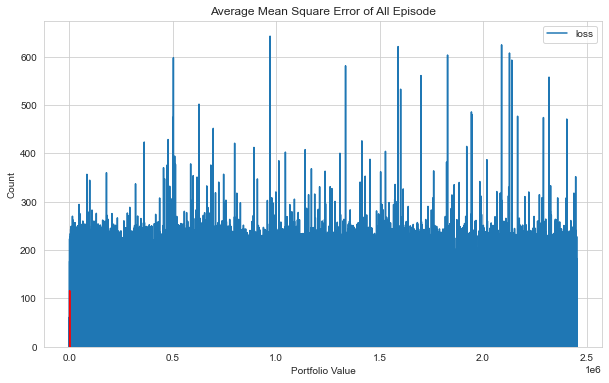

In [4]:
#train


mode = 'train'

portfolio_value = []



for e in tqdm(range(num_episodes)):
    t0 = datetime.now()
    val = play_one_episode(agent, env, mode, scaler)
    dt = datetime.now() - t0
    print(f"episode: {e + 1}/{num_episodes}, episode end value: {val['portfolio_value'][-1]:.2f}, duration: {dt}")
    portfolio_value.append(val['portfolio_value'][-1]) 


if mode == 'train':
    # save the DQN
    agent.save(f'state_dict/{stock_name}.npz')

    # save the scaler
    with open(f'scaler/{stock_name}.pkl', 'wb') as f:
        pickle.dump(scaler, f)

    # plot losses
    loss = agent.model.losses
    losses = pd.DataFrame(loss, columns=['loss'])
    losses.plot(figsize=(10,6))
    plt.title('Average Mean Square Error of All Episode')
    plt.xlabel('Step')
    plt.ylabel('Mean Square Error')

print(f'average reward: {np.mean(portfolio_value):.2f}, min: {np.min(portfolio_value):.2f}, max: {np.max(portfolio_value):.2f}')
sns.histplot(portfolio_value, bins=100, color='r', kde=True);
plt.xlabel('Portfolio Value');
plt.ylabel('Count');

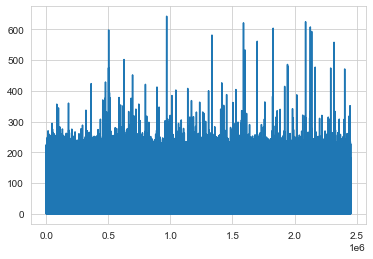

In [5]:
plt.plot(agent.model.losses)

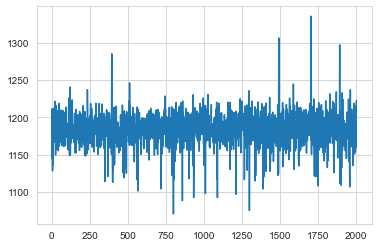

In [6]:
plt.plot(portfolio_value)

episode end value: 1166.41, duration: 0:00:00.085019
Sell: 11 times, Buy: 17 times


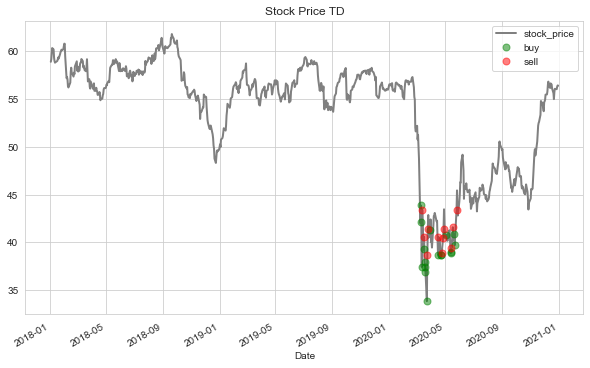

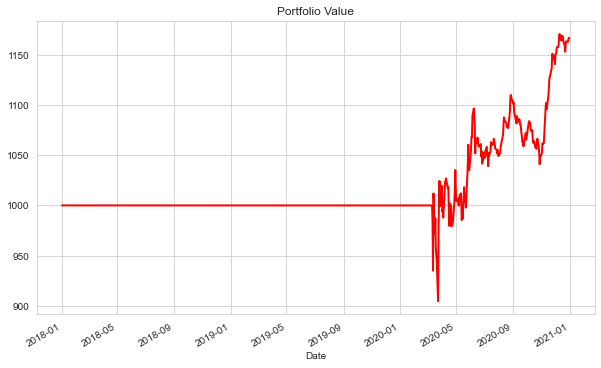

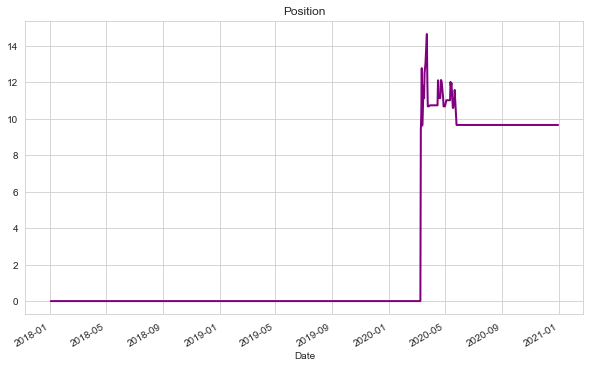

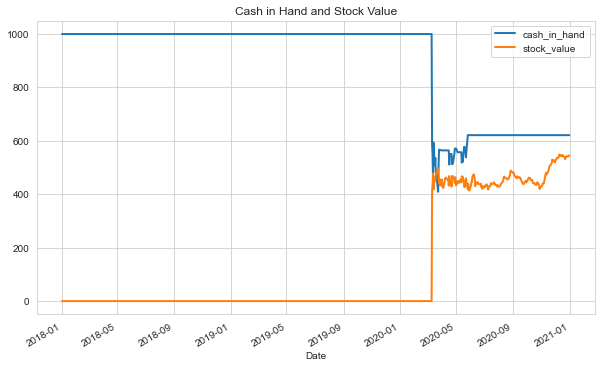

In [7]:
#test

mode = 'test'

portfolio_value = []


with open(f'scaler/{stock_name}.pkl', 'rb') as f:
    scaler = pickle.load(f)
    
env = StockEnv(test_data, capital)
agent.epsilon = 0
agent.load(f'state_dict/{stock_name}.npz')



t0 = datetime.now()
val = play_one_episode(agent, env, mode, scaler)
dt = datetime.now() - t0
print(f"episode end value: {val['portfolio_value'][-1]:.2f}, duration: {dt}")
portfolio_value.append(val['portfolio_value'][-1])
    
print(f"Sell: {env.sell_buy.count('sell')} times, Buy: {env.sell_buy.count('buy')} times")



result = pd.DataFrame(val)
result.index = test_data.index

def marker_buy(col):
    price = col[0] 
    sellbuy = col[1]
    
    if sellbuy == 'buy':
        return price
    else:
        return np.nan
    
def marker_sell(col):
    price = col[0] 
    sellbuy = col[1]
    
    if sellbuy == 'sell':
        return price
    else:
        return np.nan
    
result['marker_buy'] = result[['stock_price', 'sell_buy']].apply(marker_buy, axis=1);
result['marker_sell'] = result[['stock_price', 'sell_buy']].apply(marker_sell, axis=1);

result['stock_price'].plot(figsize=(10,6), c='grey', lw=2);
result['marker_buy'].plot(style='o', ms=7, label='buy', c='g', alpha=0.5);
result['marker_sell'].plot(style='o', ms=7, label='sell', c='r', alpha=0.5);
plt.title('Stock Price '+ stock_name)
plt.legend();
plt.show()



result['portfolio_value'].plot(figsize=(10,6), c='r', lw=2);
plt.title('Portfolio Value');
plt.show()

result['stock_owned'].plot(figsize=(10,6), c='purple', lw=2);
plt.title('Position')
plt.show()

result[['cash_in_hand', 'stock_value']].plot(figsize=(10,6), lw=2);
plt.title('Cash in Hand and Stock Value');
plt.show()

In [8]:


def CAGR(DF):
    df = DF.copy()
    try:
        df['daily_ret'] = df['portfolio_value'].pct_change()
    except:
        df['daily_ret'] = df['Adj Close'].pct_change() 
    
    df['cumulative_ret'] = (1 + df['daily_ret']).cumprod()
    n = len(df)/252
    cagr = (df['cumulative_ret'][-1])**(1/n) - 1
    return cagr

def volatility(DF):
    df = DF.copy()
    try:
        df['daily_ret'] = df['portfolio_value'].pct_change()
    except:
        df['daily_ret'] = df['Adj Close'].pct_change() 
    vol = df['daily_ret'].std() * np.sqrt(252)
    return vol


def sharpe(DF, rf):
    df = DF.copy()
    sr = (CAGR(df) - rf)/volatility(df)
    return sr

def max_dd(DF):
    df = DF.copy()
    try:
        df['daily_ret'] = df['portfolio_value'].pct_change()
    except:
        df['daily_ret'] = df['Adj Close'].pct_change() 
    df['cumulative_ret'] = (1 + df['daily_ret']).cumprod()
    df['cum_roll_max'] = df['cumulative_ret'].cummax()
    df['drawdown'] = df['cum_roll_max'] - df['cumulative_ret']
    df['drawdown_pct'] = df['drawdown']/df['cum_roll_max']
    max_dd = df['drawdown_pct'].max()
    return max_dd

def calmer(DF):
    df = DF.copy()
    clmr = CAGR(df)/max_dd(df)
    return clmr



print(f'Stock name: {stock_name}')
print(f'Start: {result.index[0]}  End: {result.index[-1]}')
print(f'Compound Annual Growth Rate: {CAGR(result)*100:.2f} %')
print(f'Volatility: {volatility(result):.4f}')
print(f'shape ratio: {sharpe(result, 0.011):.4f}')
print(f'Maximun drawdown: {max_dd(result)*-100:.2f} %')
print(f'Calmar ratio: {calmer(result):.4f}')
print('-----------------------------------------------------------')
print('-----------------------------------------------------------')
print('Comparing with Adj close')
print(f'Compound Annual Growth Rate (Adj close): {CAGR(test_data)*100:.2f} %')
print(f'Volatility (benchmark): {volatility(test_data):.4f}')
print(f'shape ratio: {sharpe(test_data, 0.011):.4f}')
print(f'Maximun drawdown: {max_dd(test_data)*-100:.2f} %')
print(f'Calmar ratio (benchmark): {calmer(test_data):.4f}')

Stock name: TD
Start: 2018-01-02 00:00:00  End: 2020-12-31 00:00:00
Compound Annual Growth Rate: 5.27 %
Volatility: 0.1117
shape ratio: 0.3729
Maximun drawdown: -10.58 %
Calmar ratio: 0.4978
-----------------------------------------------------------
-----------------------------------------------------------
Comparing with Adj close
Compound Annual Growth Rate (Adj close): -1.43 %
Volatility (benchmark): 0.2802
shape ratio: -0.0903
Maximun drawdown: -45.28 %
Calmar ratio (benchmark): -0.0316


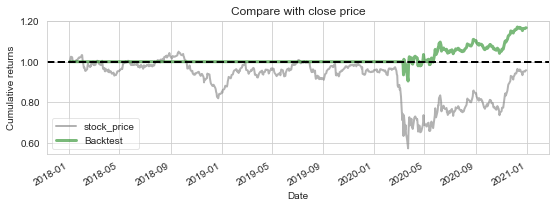

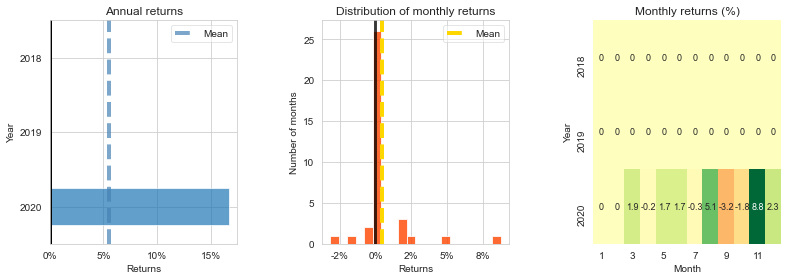

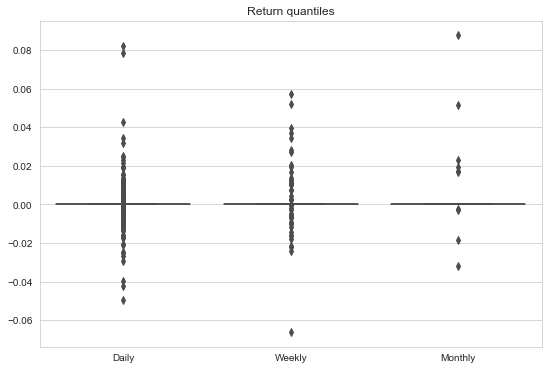

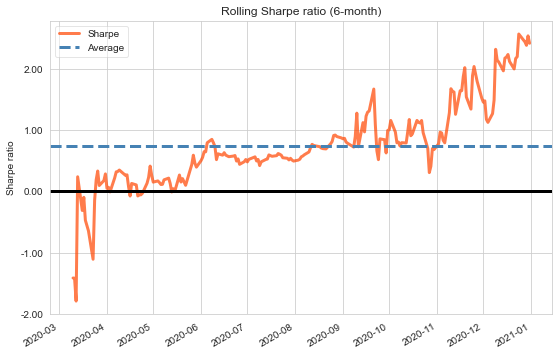

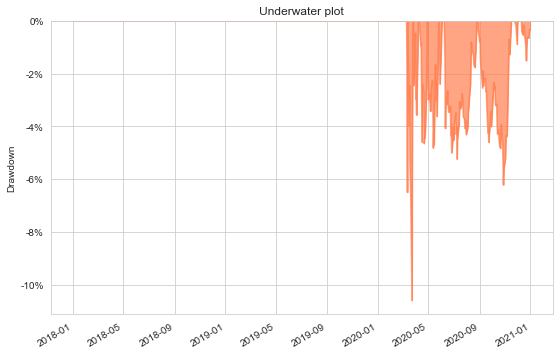

In [9]:


bt_returns = result['portfolio_value'].pct_change()
price = result['stock_price'].pct_change()



plt.figure(figsize=(9,6));
plt.subplot(2,1,1);
pf.plotting.plot_rolling_returns(bt_returns, price);
plt.title('Compare with close price');
plt.show()

fig = plt.figure(1)
plt.subplot(1,3,1)
pf.plot_annual_returns(bt_returns)
plt.subplot(1,3,2)
pf.plot_monthly_returns_dist(bt_returns)
plt.subplot(1,3,3)
pf.plot_monthly_returns_heatmap(bt_returns)
plt.tight_layout()
fig.set_size_inches(12,4)

plt.figure(figsize=(9,6))
pf.plot_return_quantiles(bt_returns);



plt.figure(figsize=(9,6))
pf.plot_rolling_sharpe(bt_returns);

plt.figure(figsize=(9,6))
pf.plot_drawdown_underwater(bt_returns);

score = (sharpe(result, 0.011) - sharpe(test_data, 0.011))*10
ret = ((result['portfolio_value'][-1] - result['portfolio_value'][0])/result['portfolio_value'][0]) * 100
with open(f'score/{stock_name}.pkl', 'wb') as f:  # Python 3: open(..., 'wb')
    pickle.dump([stock_name, industry,score, ret], f)
    
    
result.to_csv(f'../data/{stock_name}.csv')